In [13]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.2.0


In [14]:
xs = np.array([1.0,1.5,2.0,2.5,3.0,3.5],dtype=float)
ys = np.array([10,15,20,25,30,35],dtype=float)


In [15]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=[1])])
model.compile(loss='mean_squared_error',optimizer='sgd')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if(logs.get('loss')) < 0.01:
            print("Reached Loss less than 0.01 so cancelling training!")
            self.model.stop_training=True

In [18]:
callbacks = MyCallback()

In [19]:
history = model.fit(xs,ys,epochs = 800, verbose = 2,callbacks= [callbacks])

Epoch 1/800
1/1 - 0s - loss: 465.5287
Epoch 2/800
1/1 - 0s - loss: 349.6987
Epoch 3/800
1/1 - 0s - loss: 262.7601
Epoch 4/800
1/1 - 0s - loss: 197.5061
Epoch 5/800
1/1 - 0s - loss: 148.5278
Epoch 6/800
1/1 - 0s - loss: 111.7654
Epoch 7/800
1/1 - 0s - loss: 84.1717
Epoch 8/800
1/1 - 0s - loss: 63.4598
Epoch 9/800
1/1 - 0s - loss: 47.9129
Epoch 10/800
1/1 - 0s - loss: 36.2429
Epoch 11/800
1/1 - 0s - loss: 27.4825
Epoch 12/800
1/1 - 0s - loss: 20.9062
Epoch 13/800
1/1 - 0s - loss: 15.9690
Epoch 14/800
1/1 - 0s - loss: 12.2621
Epoch 15/800
1/1 - 0s - loss: 9.4787
Epoch 16/800
1/1 - 0s - loss: 7.3884
Epoch 17/800
1/1 - 0s - loss: 5.8183
Epoch 18/800
1/1 - 0s - loss: 4.6386
Epoch 19/800
1/1 - 0s - loss: 3.7520
Epoch 20/800
1/1 - 0s - loss: 3.0854
Epoch 21/800
1/1 - 0s - loss: 2.5839
Epoch 22/800
1/1 - 0s - loss: 2.2063
Epoch 23/800
1/1 - 0s - loss: 1.9217
Epoch 24/800
1/1 - 0s - loss: 1.7070
Epoch 25/800
1/1 - 0s - loss: 1.5447
Epoch 26/800
1/1 - 0s - loss: 1.4217
Epoch 27/800
1/1 - 0s - los

In [20]:
model.predict([5.0])

array([[49.47635]], dtype=float32)

In [21]:
import matplotlib.pyplot as plt

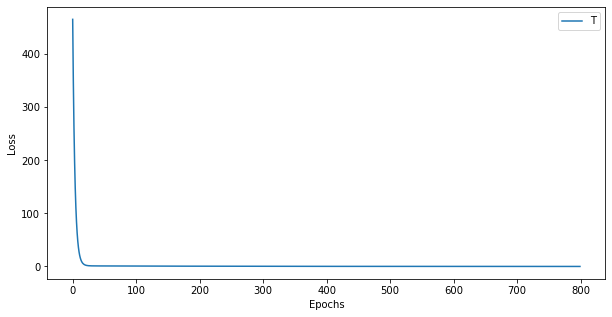

In [22]:
epoch = [int(i) for i in range(len(history.history['loss']))]
loss = history.history['loss']
plt.figure(figsize=(10,5))
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend("Training Loss")

In [ ]:
del history
del model

In [71]:
import gc
gc.collect()

22

In [68]:
tf.keras.backend.clear_session()